In [ ]:
############################### Ontario House Prediction Analysis ##########################################


# This project explores predictive analysis for housing-related factors in Ontario
# Applying machine learning techniques. 
# The goal is to provide insights into property prices, aiding stakeholders in making informed investment decisions. 
# The analysis includes preprocessing data, applying predictive models, and assessing potential risks and opportunities in various Ontario areas.


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer


In [46]:
# Load the dataset


housing = pd.read_csv("ontario_properties.csv")

housing.shape

(25351, 6)

In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25351 entries, 0 to 25350
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25351 non-null  int64  
 1   Address     25351 non-null  object 
 2   AreaName    24868 non-null  object 
 3   Price ($)   25351 non-null  int64  
 4   lat         25351 non-null  float64
 5   lng         25351 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ MB


In [48]:
# Display the first few rows of the dataset

housing.head()

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [49]:
housing.columns

Index(['Unnamed: 0', 'Address', 'AreaName', 'Price ($)', 'lat', 'lng'], dtype='object')

In [50]:
housing.describe()

,Unnamed: 0,Price ($),lat,lng
count,25351.000000,2.535100e+04,25351.000000,25351.000000
mean,42878.517613,5.645438e+05,37.326614,-85.218379
std,31456.247046,8.475962e+05,82.858347,73.093572
min,0.000000,0.000000e+00,-999.000000,-999.000000
25%,19940.000000,2.199000e+05,43.401087,-80.308159
50%,34037.000000,3.719000e+05,43.715977,-79.503342
75%,61501.500000,6.199000e+05,44.466711,-79.107326
max,124929.000000,3.250000e+07,53.851017,1.074519


In [51]:
# Check for missing values

print(housing.isnull().sum())

Unnamed: 0      0
Address         0
AreaName      483
Price ($)       0
lat             0
lng             0
dtype: int64


In [52]:
housing = housing.dropna(subset=['AreaName'])
housing

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...,...
25346,124922,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,124924,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,124925,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,124928,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [53]:
# Check available columns

housing.columns




Index(['Unnamed: 0', 'Address', 'AreaName', 'Price ($)', 'lat', 'lng'], dtype='object')

In [71]:
### counts of properties in each area ############


counts = housing['AreaName'].value_counts()

counts

Downtown                     830
Mississauga                  752
Waterloo                     459
Niagara Falls                355
Richmond Hill                335
                            ... 
Cavan                          1
Thorah Island                  1
Beechborough - Greenbrook      1
Broadview North                1
Appleby                        1
Name: AreaName, Length: 1119, dtype: int64

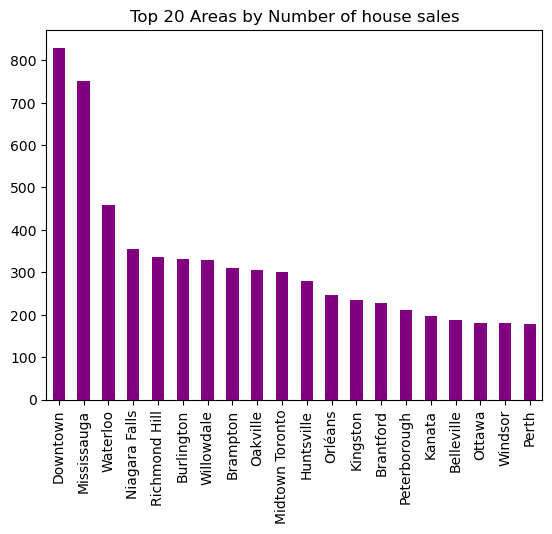

In [72]:
# Create a bar chart

plt=counts[0:20].plot(kind='bar', color='purple',title="Top 20 Areas by Number of house sales")

In [54]:
#Group the data by "AreaName" and calculate the average price
    
average_prices = housing.groupby('AreaName')['Price ($)'].mean()

average_prices

AreaName
Aberfoyle                  6.800000e+04
Acton                      3.793000e+05
Agassiz                    7.400000e+04
Agincourt                  4.252873e+05
Agincourt North            2.200000e+06
                               ...     
York Mills                 4.436242e+06
York University Heights    4.832300e+05
Yorkdale                   1.208333e+05
Zephyr                     1.142386e+06
Zurich                     2.279000e+05
Name: Price ($), Length: 1119, dtype: float64

In [55]:
# Top 20 areas with highest average prices

top_n_areas = average_prices.nlargest(20)  



# Bottom 20 areas with lowest average prices

bottom_n_areas = average_prices.nsmallest(20) 



# Print or use these top and bottom areas as needed

print("Top 20 Areas:")
print(top_n_areas)

print("\nBottom 20 Areas:")
print(bottom_n_areas)


Top 20 Areas:
AreaName
Bridle Path                   1.518329e+07
Appleby                       9.000000e+06
Lytton Park                   4.499900e+06
York Mills                    4.436242e+06
Tempo                         4.198333e+06
Edenbridge - Humber Valley    3.627822e+06
St. Andrew - Windfields       3.393979e+06
Armour Heights                3.270000e+06
Pelee Island                  3.200000e+06
Crerar                        3.199818e+06
Clarington                    3.012860e+06
East Bayfront                 2.785000e+06
Chestnut Hills                2.749900e+06
Windfields                    2.707292e+06
Florida                       2.700000e+06
Caribou Park                  2.680000e+06
Pioneer Tower East            2.549950e+06
Thorncrest Village            2.537500e+06
West Queen West               2.396750e+06
Rural Oshawa                  2.339980e+06
Name: Price ($), dtype: float64

Bottom 20 Areas:
AreaName
North End West                           0.000000
Port Lan

In [56]:
# Find the area with the highest average price

area_with_highest_price = average_prices.idxmax()

area_with_highest_price

'Bridle Path'

In [57]:
# find the highest average price 

highest_average_price = average_prices.max()

highest_average_price

15183285.714285715

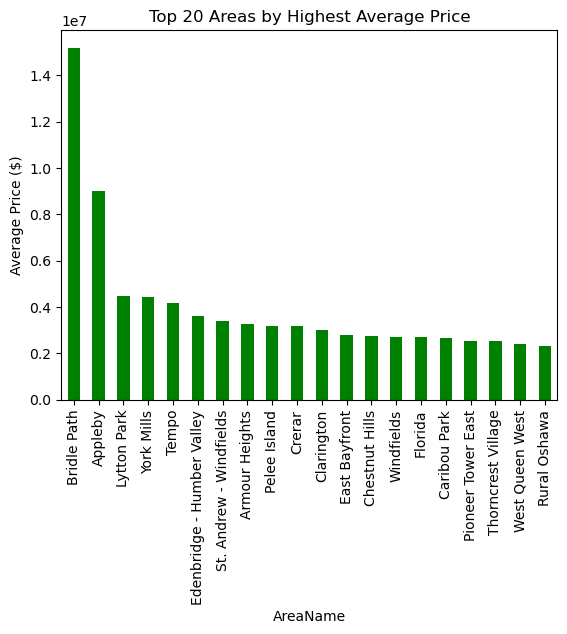

In [73]:
# Create a bar chart


top_20_areas = average_prices.sort_values(ascending=False).head(20)


plt=top_20_areas.plot(kind='bar', color='green',title="Top 20 Areas by Highest Average Price",ylabel="Average Price ($)")

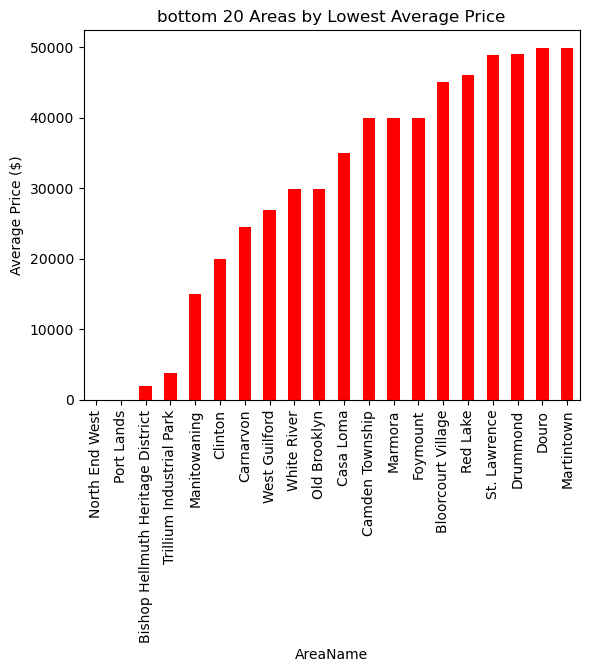

In [74]:
# Create a bar chart



bottom_20_areas = average_prices.sort_values(ascending=True).head(20)


plt=bottom_20_areas.plot(kind='bar', color='red',title="bottom 20 Areas by Lowest Average Price",ylabel="Average Price ($)")

In [59]:
# Check available columns
housing.columns


Index(['Unnamed: 0', 'Address', 'AreaName', 'Price ($)', 'lat', 'lng'], dtype='object')

In [76]:


from sklearn.model_selection import train_test_split

X = housing.drop(['Price ($)'],axis=1)
Y = housing['Price ($)']





In [80]:
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)



# Combine features and target variable for the training set
train_data = X_train.join(y_train)

train_data

,Unnamed: 0,Address,AreaName,lat,lng,Price ($)
11223,32585,"32 CEDAR VALLEY DRIVE Kanata, ON",Kanata,45.282478,-75.850533,599000
9121,29045,"2306 Bois Vert Place Orleans, ON",Orléans,45.458168,-75.480278,219000
1711,5620,"#1916 - 45 CARLTON ST Toronto, ON",Downtown,43.661385,-79.380608,599900
6761,22008,"993 Brookfield Road Ottawa, ON",Alta Vista,45.374279,-75.675613,535000
24355,113667,"6 Centre St Lansdowne, ON",Lansdowne,44.404781,-76.017311,189900
...,...,...,...,...,...,...
21928,84874,"LOT 237 CAMBRIDGE Road W Crystal Beach, ON",Fort Erie,42.864365,-79.062050,49900
5495,19089,"250 Glenridge Drive Waterloo, ON",Waterloo,43.482048,-80.511574,349900
861,2803,"#562 - 209 FORT YORK BLVD S Toronto, ON",Niagara,43.636963,-79.404671,349000
16073,38925,"85 OXFORD ST Richmond Hill, ON",Richmond Hill,43.885166,-79.448578,1649000


array([[<Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lng'}>],
       [<Axes: title={'center': 'Price ($)'}>, <Axes: >]], dtype=object)

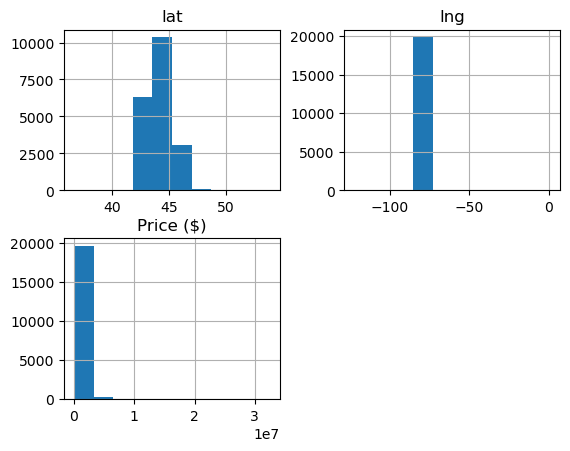

In [61]:
train_data.hist()

In [62]:
# Calculate the correlation matrix

correlation_matrix = train_data.corr()
correlation_matrix

/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_87609/2707446889.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,lat,lng,Price ($)
lat,1.000000,0.547325,-0.048727
lng,0.547325,1.000000,0.013094
Price ($),-0.048727,0.013094,1.000000


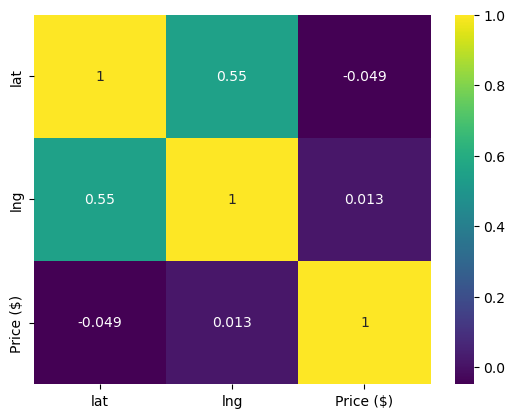

In [81]:

import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap 
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")

# Show the plot
plt.show()




Mean Squared Error: 542564642601.2718


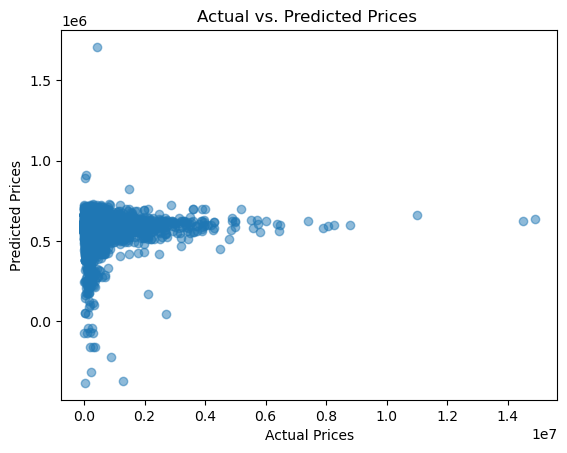

In [88]:
# Extract numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Extract categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define the columns that need one-hot encoding (categorical variables)
categorical_columns = ['AreaName']

# Create a ColumnTransformer to apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('numeric', 'passthrough', numerical_features)
    ],
    remainder='drop'
)

# Apply the preprocessing steps to training set
X_train_encoded = preprocessor.fit_transform(X_train)

# Apply the same preprocessing to the testing set
X_test_encoded = preprocessor.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the encoded training data
model.fit(X_train_encoded, y_train)

# Make predictions on the encoded testing set
predictions = model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize predictions vs. actual values with area names
plt.scatter(y_test, predictions, alpha=0.5)  # Using alpha for transparency
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices ')
plt.show()


In [89]:
import plotly.express as px

# Create a DataFrame with the necessary information
plot_data = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': predictions, 'AreaName': X_test['AreaName']})

# Create an interactive scatter plot
fig = px.scatter(plot_data, x='Actual Prices', y='Predicted Prices', color='AreaName', hover_data=['AreaName'])
fig.update_layout(title='Actual vs. Predicted Prices with Area Names')
fig.show()


In [98]:
############ Top Areas #######################


# Get the top areas with highest predicted prices

top_predicted_areas = pd.DataFrame({'AreaName': X_test['AreaName'], 'Actual Price': y_test, 'Predicted Price': predictions})
top_predicted_areas = top_predicted_areas.sort_values(by='Predicted Price', ascending=False).head(10)

# Display the top predicted areas
print("Top Predicted Areas:")
print(top_predicted_areas)


Top Predicted Areas:
            AreaName  Actual Price  Predicted Price
16584       Beverley        429900     1.708990e+06
8485         Agassiz         74000     9.088564e+05
2835        Brighton         20000     8.938482e+05
23827     Plainfield       1475000     8.258392e+05
24803  Niagara Falls        829000     7.282068e+05
24845  Niagara Falls        295000     7.278244e+05
24906  Niagara Falls          2300     7.268908e+05
25195  Niagara Falls       1200000     7.255464e+05
25042  Niagara Falls        549000     7.251330e+05
24830  Niagara Falls        848888     7.245910e+05


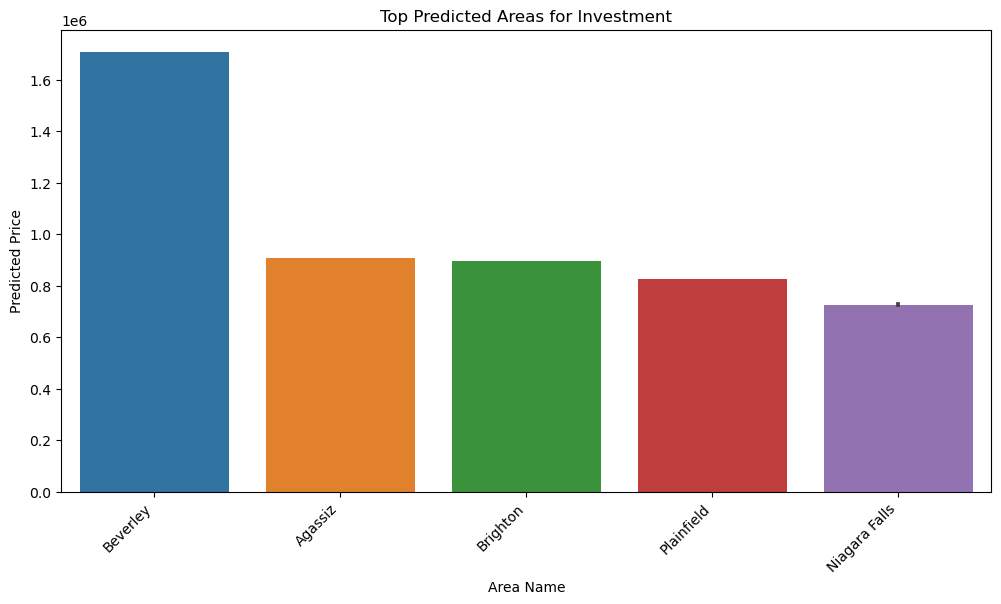

In [99]:
####################### Visualization ###################


# Visualize predicted prices for top areas

plt.figure(figsize=(12, 6))
sns.barplot(x='AreaName', y='Predicted Price', data=top_predicted_areas)
plt.title('Top Predicted Areas for Investment')
plt.xlabel('Area Name')
plt.ylabel('Predicted Price')
plt.xticks(rotation=45, ha='right')
plt.show()


In [129]:
################ Risk Assesment ##########

import pandas as pd

# Assuming 'y_test' is the actual prices and 'predictions' is the predicted prices

comparison_df = pd.DataFrame({'AreaName': X_test['AreaName'], 'Actual Price': y_test, 'Predicted Price': predictions})

# Calculate the standard deviation of predicted prices for each area

area_std_dev = comparison_df.groupby('AreaName')['Predicted Price'].std()
area_std_dev



AreaName
Aberfoyle                           NaN
Acton                               NaN
Agassiz                             NaN
Agincourt                  25528.655181
Agincourt North                     NaN
                               ...     
York                                NaN
York Mills                 22064.058504
York University Heights    29704.584608
Yorkdale                     420.020603
Zephyr                       834.317003
Name: Predicted Price, Length: 765, dtype: float64

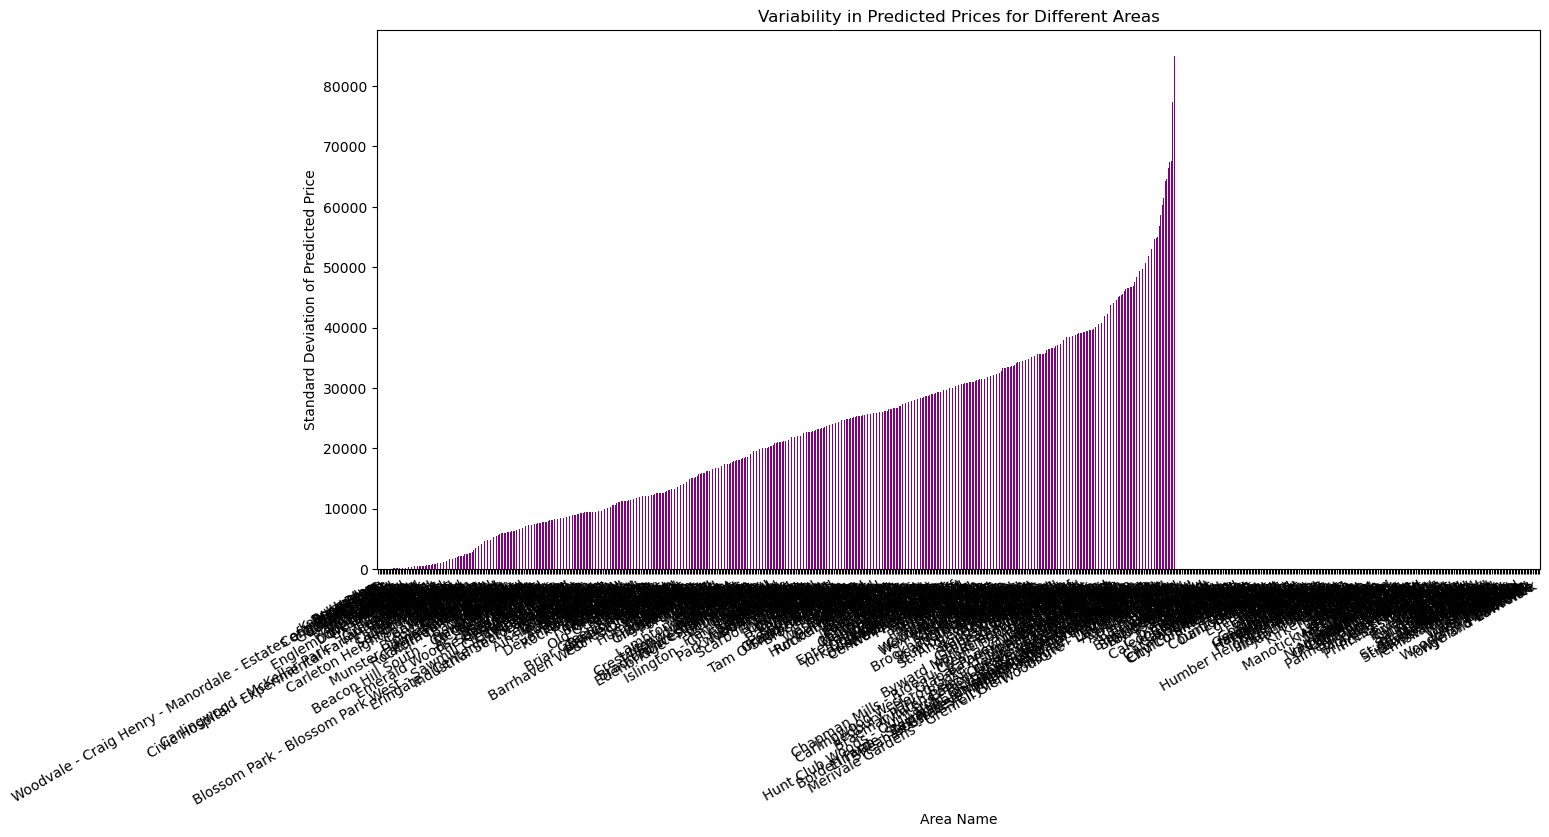

In [128]:
# Visualize variability in predictions(Bar chart )

plt.figure(figsize=(15, 7))
area_std_dev.sort_values().plot(kind='bar', color='purple')
plt.title('Variability in Predicted Prices for Different Areas')
plt.xlabel('Area Name')
plt.ylabel('Standard Deviation of Predicted Price')
plt.xticks(rotation=30, ha='right')
plt.show()

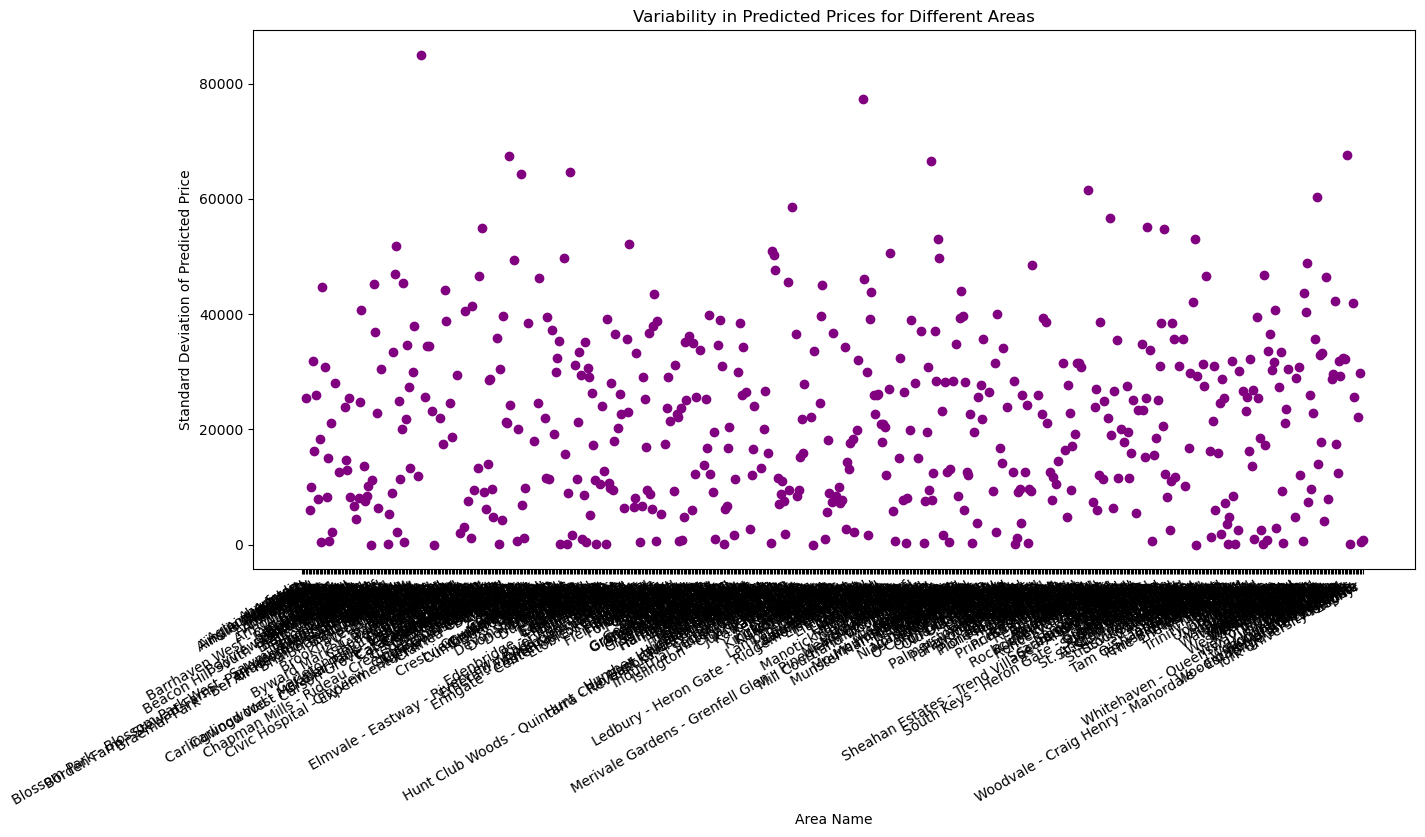

In [126]:
## Visualize variability in predictions(Scatter plot)

plt.figure(figsize=(15, 7))
plt.scatter(area_std_dev.index, area_std_dev.values, color='purple')
plt.title('Variability in Predicted Prices for Different Areas')
plt.xlabel('Area Name')
plt.ylabel('Standard Deviation of Predicted Price')
plt.xticks(rotation=30, ha='right')
plt.show()


In [111]:
# Generate a recommendation report

recommendation_report = """
Investment Recommendation Report

Top Predicted Areas for Investment:
{}
Analysis Summary:
- The top areas with the highest predicted prices present attractive investment opportunities.
- Variability in predictions should be considered for risk assessment.
- note that a higher standard deviation may be considered as an indicator of higher risk,
as it suggests that the predicted prices for that area are less consistent or more volatile.


""".format(top_predicted_areas.to_string(index=False))

print(recommendation_report)



Investment Recommendation Report

Top Predicted Areas for Investment:
     AreaName  Actual Price  Predicted Price
     Beverley        429900     1.708990e+06
      Agassiz         74000     9.088564e+05
     Brighton         20000     8.938482e+05
   Plainfield       1475000     8.258392e+05
Niagara Falls        829000     7.282068e+05
Niagara Falls        295000     7.278244e+05
Niagara Falls          2300     7.268908e+05
Niagara Falls       1200000     7.255464e+05
Niagara Falls        549000     7.251330e+05
Niagara Falls        848888     7.245910e+05
Analysis Summary:
- The top areas with the highest predicted prices present attractive investment opportunities.
- Variability in predictions should be considered for risk assessment.



